In [15]:
import pandas as pd

df = pd.read_csv("heart.csv")

# view data
print(df.head())

# target distribution
print("\nHeart Disease Count (num column):")
print(df['num'].value_counts())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  

Heart D

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 🔹 1. Separate X and y
X = df.drop('num', axis=1)
y = df['num']

# 🔹 2. Encode categorical columns
label = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':     # If column contains strings
        X[col] = label.fit_transform(X[col])

# 🔹 3. Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Encoding + Scaling Successful! No more 'Male' error 😊")


Encoding + Scaling Successful! No more 'Male' error 😊


In [17]:

pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("🔥 Accuracy:", accuracy_score(y_test, pred)*100, "%")


🔥 Accuracy: 59.78260869565217 %


In [19]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
# check missing values
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [21]:
# 🔹 Fill only numeric columns with mean
df[df.select_dtypes(include=['float64','int64']).columns] = \
    df.select_dtypes(include=['float64','int64']).fillna(df.mean(numeric_only=True))

# 🔹 Fill categorical columns with mode (most frequent value)
df[df.select_dtypes(include=['object']).columns] = \
    df.select_dtypes(include=['object']).fillna(df.select_dtypes(include=['object']).mode().iloc[0])

print("Missing values handled successfully! ✔")


Missing values handled successfully! ✔


C:\Users\sreen\AppData\Local\Temp\ipykernel_18500\3332799834.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.select_dtypes(include=['object']).fillna(df.select_dtypes(include=['object']).mode().iloc[0])


In [22]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Label encode them
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Categorical values converted to numeric ✔")


Categorical values converted to numeric ✔


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Split X & y
X = df.drop('num', axis=1)
y = df['num']

# Standard Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply SMOTE oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier(
    n_estimators=350,
    learning_rate=0.03,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("🚀 Improved Accuracy:", accuracy_score(y_test, pred)*100, "%")


🚀 Improved Accuracy: 85.64476885644768 %


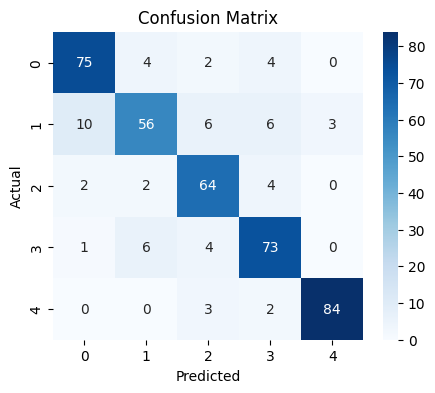


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        85
           1       0.82      0.69      0.75        81
           2       0.81      0.89      0.85        72
           3       0.82      0.87      0.84        84
           4       0.97      0.94      0.95        89

    accuracy                           0.86       411
   macro avg       0.85      0.86      0.85       411
weighted avg       0.86      0.86      0.86       411



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

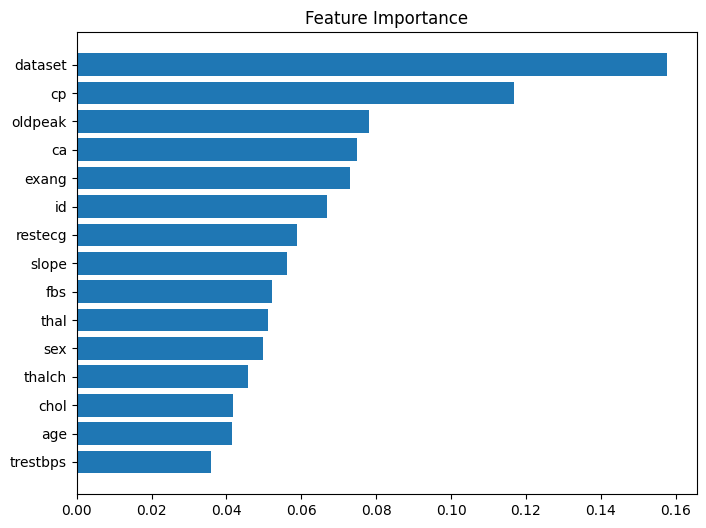

In [25]:
import numpy as np

importances = model.feature_importances_
columns = df.drop('num',axis=1).columns
idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(columns[idx], importances[idx])
plt.title("Feature Importance")
plt.show()